In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


cyberdata=pd.read_csv("cybersecurity_attacks.csv")
cyberdata.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


### Transform Timestamp into a datetime format

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


cyberdata.columns = cyberdata.columns.str.strip()  
cyberdata.columns = cyberdata.columns.str.lower()  

timestamp = cyberdata[["timestamp", "attack type"]].copy()
timestamp["timestamp"] = pd.to_datetime(timestamp["timestamp"], errors='coerce')
print(timestamp.head())


            timestamp attack type
0 2023-05-30 06:33:58     Malware
1 2020-08-26 07:08:30     Malware
2 2022-11-13 08:23:25        DDoS
3 2023-07-02 10:38:46     Malware
4 2023-07-16 13:11:07        DDoS


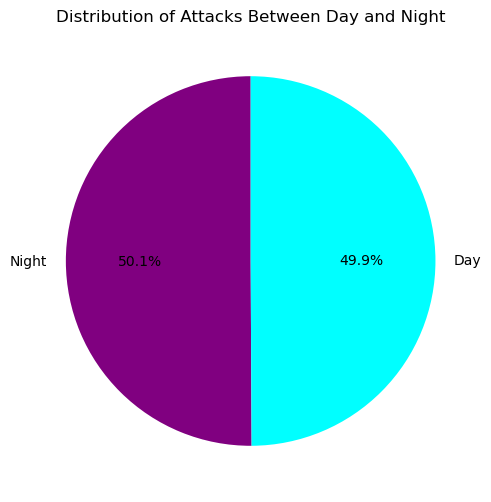

<Figure size 1200x600 with 0 Axes>

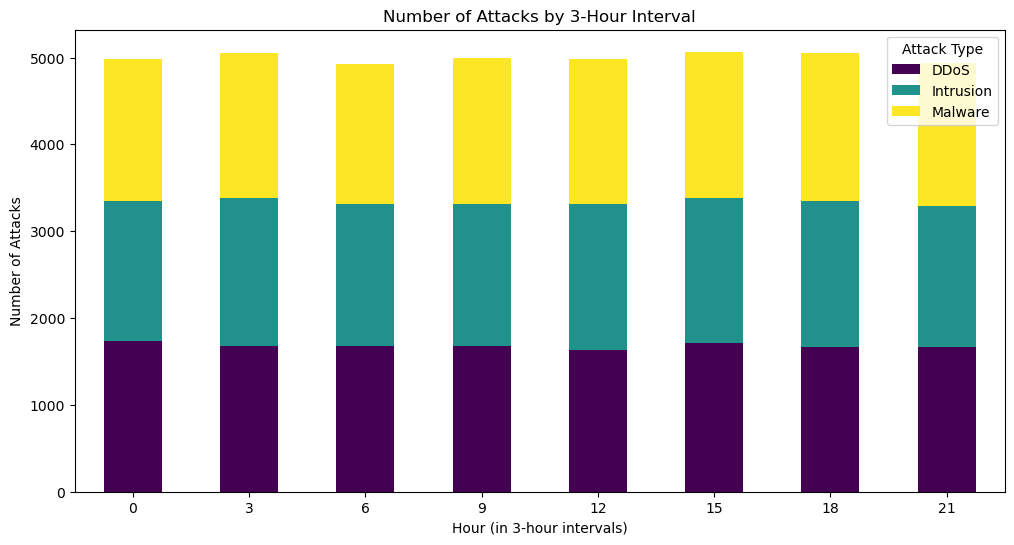

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

timestamp["hour"] = timestamp["timestamp"].dt.hour

def classify_time(hour):
    return "Day" if 6 <= hour < 18 else "Night"

timestamp["time_period"] = timestamp["hour"].apply(classify_time)
attack_counts_by_time = timestamp.groupby(["time_period", "attack type"]).size().unstack(fill_value=0)
plt.figure(figsize=(6, 6))
attack_counts = timestamp["time_period"].value_counts()
plt.pie(
    attack_counts, labels=attack_counts.index, autopct="%1.1f%%", startangle=90, colors=["purple", "cyan"]
)
plt.title("Distribution of Attacks Between Day and Night")
plt.show()


timestamp["time_slot"] = (timestamp["hour"] // 3) * 3
attacks_by_slot = timestamp.groupby(["time_slot", "attack type"]).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
attacks_by_slot.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Number of Attacks by 3-Hour Interval")
plt.ylabel("Number of Attacks")
plt.xlabel("Hour (in 3-hour intervals)")
plt.xticks(rotation=0)
plt.legend(title="Attack Type")
plt.show()


## Bilan


Finaly we can conclude that timestamp col is trapped by ai so its a col that is non categorical and don't give any information.
You have to go timestamps.